In [1]:
import tensorflow as tf

2025-12-28 15:13:21.985510: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-28 15:13:24.144956: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-28 15:13:25.361372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766931206.478335    4893 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766931206.726856    4893 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766931209.480124    4893 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [4]:
mnist = tf.keras.datasets.mnist

In [11]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile( optimizer= "adam",
               loss= "sparse_categorical_crossentropy",
               metrics=["accuracy"]
             )
model.fit(X_train, y_train, epochs=3)

2025-12-28 16:10:33.119195: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-12-28 16:10:37.991735: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9252 - loss: 0.2567
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9669 - loss: 0.1056
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9775 - loss: 0.0711


In [16]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

 46/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9730 - loss: 0.0808

2025-12-28 16:15:33.148608: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9730 - loss: 0.0896
0.08961101621389389 0.9729999899864197


In [17]:
prediction = model.predict([X_test])

2025-12-28 16:18:47.817570: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


 74/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/home/yves/anaconda3/envs/tensflow/lib/python3.12/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


/home/yves/anaconda3/envs/tensflow/lib/python3.12/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


In [18]:
print(prediction)

[[8.0406597e-09 4.2513571e-07 7.6316152e-05 ... 9.9961203e-01
  2.2566894e-08 1.8035463e-08]
 [4.5460027e-09 1.9942234e-05 9.9997824e-01 ... 1.3119259e-09
  1.9242572e-08 1.0347777e-11]
 [6.4947790e-07 9.9992174e-01 4.5080637e-06 ... 3.4355628e-05
  1.0890165e-05 1.0861781e-06]
 ...
 [1.4636887e-08 1.0689027e-06 5.2939278e-08 ... 2.4714764e-05
  9.1017387e-07 2.5356087e-04]
 [6.0237322e-05 1.6041709e-05 1.4754620e-06 ... 2.8004929e-06
  1.0676628e-03 3.6427423e-08]
 [1.2969735e-05 1.7349677e-09 9.9872921e-08 ... 4.1196734e-11
  1.8839489e-07 2.5255011e-08]]


In [21]:
import numpy as np
print(np.argmax(prediction[0]))

7


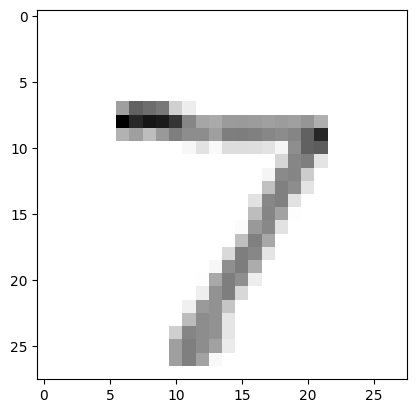

In [22]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0], cmap = plt.cm.binary)
plt.show()
#print(X_train[0])

In [9]:
print(y_train[0])

5
